In [254]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import timedelta

warnings.filterwarnings('ignore')

In [255]:
# 데이터 불러오기
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
ss = pd.read_csv('../data/sample_submission.csv')

# 컬럼명 영문으로 변경하기
train.columns = ['num','date_time','target','temperature','windspeed','humidity','precipitation','insolation','nelec_cool_flag','solar_flag']
test.columns = ['num','date_time','temperature','windspeed','humidity','precipitation','insolation','nelec_cool_flag','solar_flag']

In [256]:
train['date'] = train['date_time'].apply(lambda x: x.split()[0])
train['date_time'] = train['date_time'].apply(lambda x: x.split()[1])
# train['date_time'] = train['date_time'].str.rjust(8,'0') # 한자릿수 시간 앞에 0 추가 ex) 3시 -> 03시

# 24시를 00시로 바꿔주기
train.loc[train['date_time']=='24:00:00','date_time'] = '00:00:00'
train['date_time'] = train['date'] + ' ' + train['date_time']
train['date_time'] = pd.to_datetime(train['date_time'])
train.loc[train['date_time'].dt.hour==0,'date_time'] += timedelta(days=1)

In [257]:
train['month'] = train['date_time'].dt.month
train['date'] = train['date_time'].dt.date
train['hour'] = train['date_time'].dt.hour

In [258]:
mean_date = train.groupby('date').mean()
mean_date

,num,target,temperature,windspeed,humidity,precipitation,insolation,nelec_cool_flag,solar_flag,month,hour
date,,,,,,,,,,,
2020-06-01,30.5,2075.973509,20.386812,3.000290,67.148551,0.013986,0.484275,0.683333,0.483333,6.0,12.0
2020-06-02,30.5,2032.467582,18.953194,2.084514,65.334028,0.053542,0.175069,0.683333,0.483333,6.0,11.5
2020-06-03,30.5,2121.407665,21.606181,2.150208,76.361806,0.002569,0.288542,0.683333,0.483333,6.0,11.5
2020-06-04,30.5,2210.806437,22.690278,2.451736,78.574306,0.008333,0.307986,0.683333,0.483333,6.0,11.5
2020-06-05,30.5,2199.939486,22.869514,1.747847,75.467361,0.000000,0.362361,0.683333,0.483333,6.0,11.5
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-21,30.5,2697.454326,27.167014,1.580903,81.099306,0.027431,0.247778,0.683333,0.483333,8.0,11.5
2020-08-22,30.5,2251.552156,25.731181,1.826181,84.099306,0.798264,0.097847,0.683333,0.483333,8.0,11.5
2020-08-23,30.5,2190.462955,26.114583,1.589444,79.353472,0.008681,0.342500,0.683333,0.483333,8.0,11.5


## 월별 전력사용량 변화

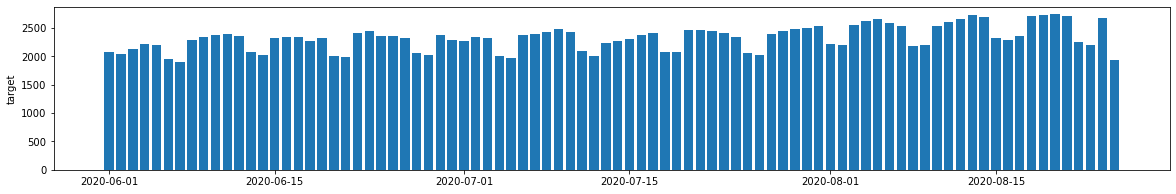

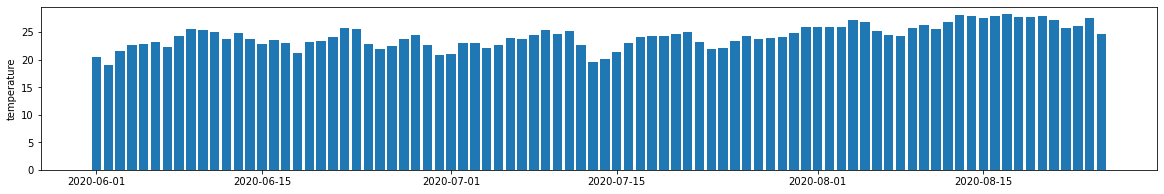

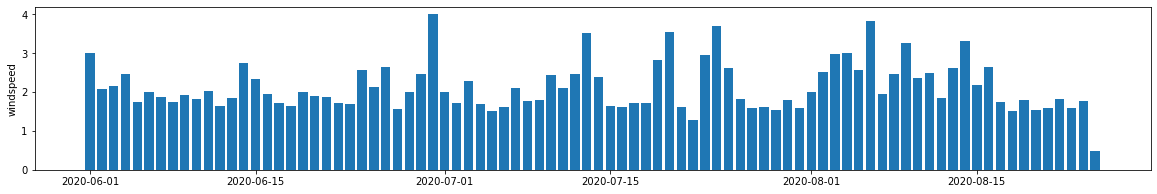

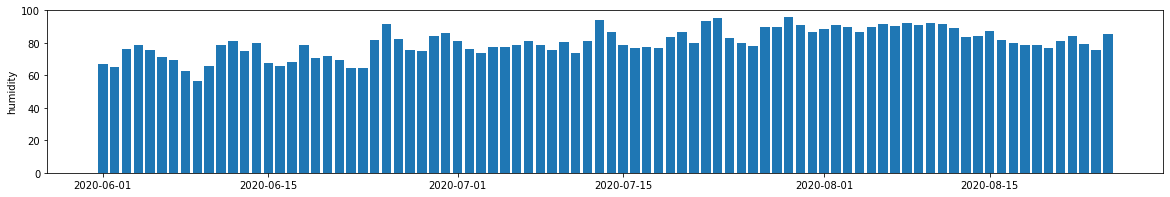

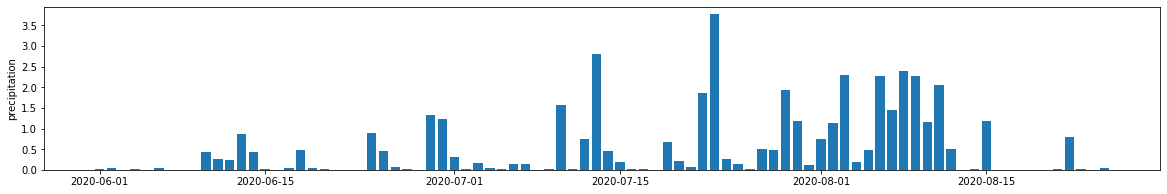

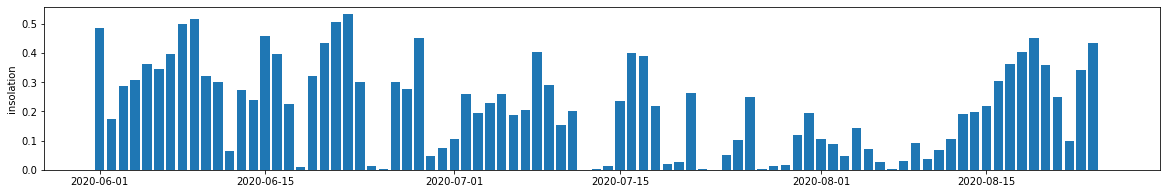

In [259]:
columns = ['target', 'temperature', 'windspeed', 'humidity', 'precipitation', 'insolation']
for c in columns:
    fig = plt.figure(figsize = (20,3))
    plt.bar(mean_date.index, getattr(mean_date, c))
    plt.ylabel(c)
    plt.show()

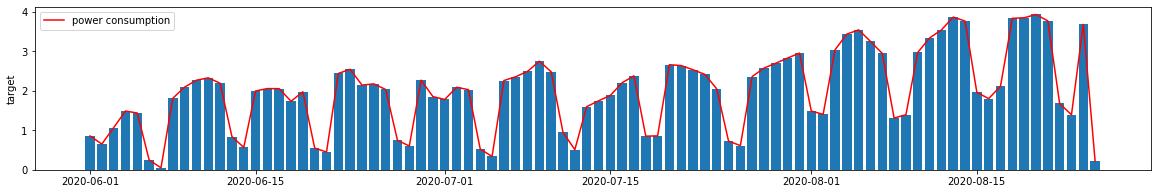

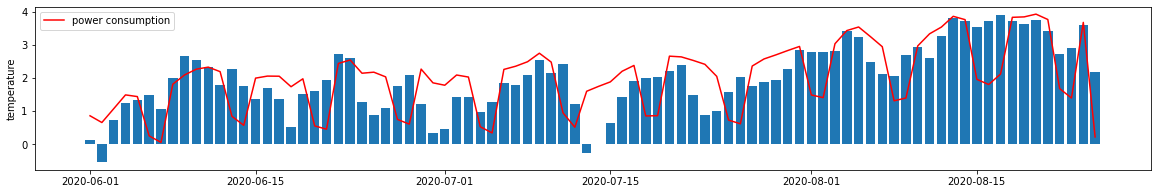

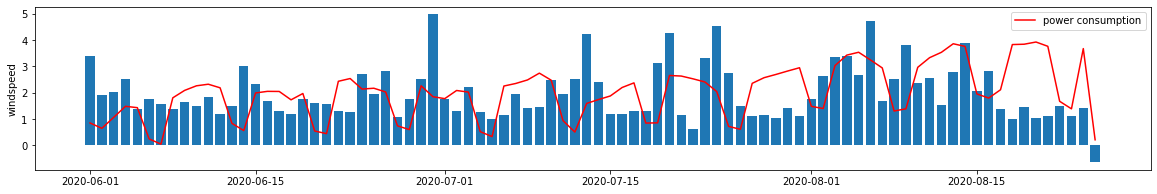

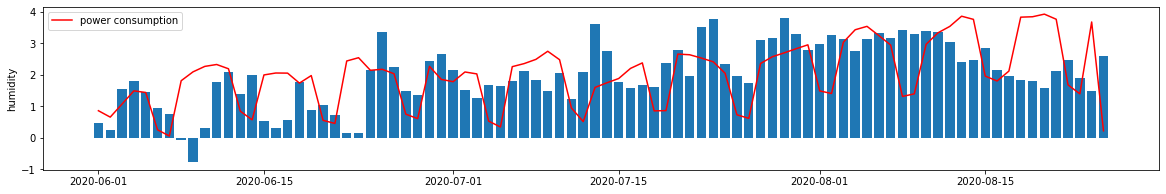

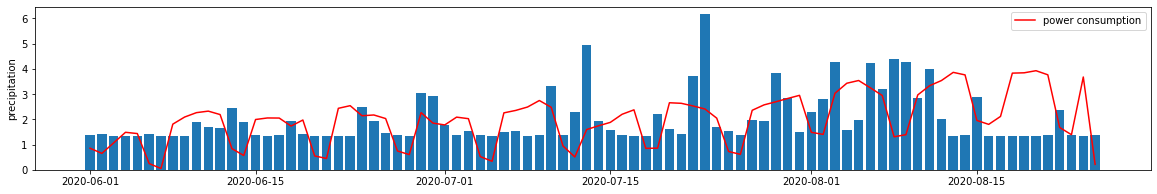

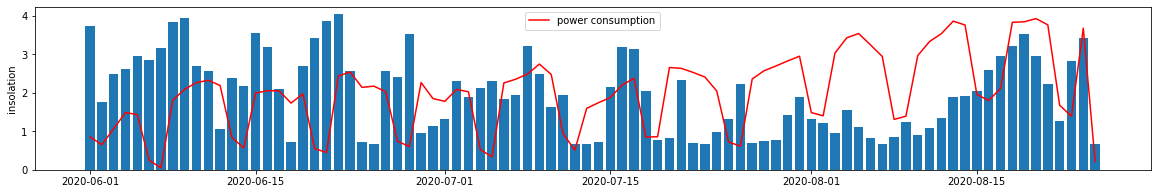

In [260]:
columns = ['target', 'temperature', 'windspeed', 'humidity', 'precipitation', 'insolation']
# columns = ['target']

df = mean_date[columns]
normalized_df = (df - df.mean()) / df.std() + 2

for c in columns:
    fig = plt.figure(figsize = (20,3))
    plt.plot(normalized_df.index, normalized_df.target, color="red", label="power consumption")
    plt.bar(normalized_df.index, getattr(normalized_df, c))
    plt.ylabel(c)
    plt.legend()
    plt.show()

## 빌딩 하나만 뽑아서 해보자

In [261]:
building = train[train['num']==10]
building

,num,date_time,target,temperature,windspeed,humidity,precipitation,insolation,nelec_cool_flag,solar_flag,date,month,hour
18360,10,2020-06-02 00:00:00,417.960,18.3,2.5,94.0,0.0,0.0,1.0,0.0,2020-06-02,6,0
18361,10,2020-06-01 01:00:00,407.592,18.8,2.3,89.0,0.0,0.0,1.0,0.0,2020-06-01,6,1
18362,10,2020-06-01 02:00:00,404.028,19.0,3.2,86.0,0.0,0.0,1.0,0.0,2020-06-01,6,2
18363,10,2020-06-01 03:00:00,397.548,19.0,4.1,85.0,0.0,0.0,1.0,0.0,2020-06-01,6,3
18364,10,2020-06-01 04:00:00,397.224,18.9,3.9,87.0,0.0,0.0,1.0,0.0,2020-06-01,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20395,10,2020-08-24 19:00:00,1823.472,27.9,1.7,83.0,0.0,0.6,1.0,0.0,2020-08-24,8,19
20396,10,2020-08-24 20:00:00,962.280,27.4,1.4,83.0,0.0,0.0,1.0,0.0,2020-08-24,8,20
20397,10,2020-08-24 21:00:00,626.940,27.1,1.4,86.0,0.0,0.0,1.0,0.0,2020-08-24,8,21
20398,10,2020-08-24 22:00:00,544.968,26.9,0.0,84.0,0.0,0.0,1.0,0.0,2020-08-24,8,22


In [262]:
building_mean_date = building.groupby('date').mean()
building_mean_date

,num,target,temperature,windspeed,humidity,precipitation,insolation,nelec_cool_flag,solar_flag,month,hour
date,,,,,,,,,,,
2020-06-01,10.0,1347.45887,22.078261,3.652174,69.913043,0.0,0.460870,1.0,0.0,6.0,12.0
2020-06-02,10.0,1269.25650,21.095833,3.575000,52.041667,0.0,0.491667,1.0,0.0,6.0,11.5
2020-06-03,10.0,1328.60250,21.345833,4.337500,77.791667,0.0,0.245833,1.0,0.0,6.0,11.5
2020-06-04,10.0,1361.82600,22.583333,4.391667,78.791667,0.0,0.425000,1.0,0.0,6.0,11.5
2020-06-05,10.0,1385.28900,22.225000,2.058333,79.125000,0.0,0.458333,1.0,0.0,6.0,11.5
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-21,10.0,1588.63350,26.962500,2.554167,75.416667,0.0,0.454167,1.0,0.0,8.0,11.5
2020-08-22,10.0,1551.56850,26.916667,2.612500,73.833333,0.0,0.283333,1.0,0.0,8.0,11.5
2020-08-23,10.0,1531.74900,26.945833,2.270833,77.375000,0.0,0.370833,1.0,0.0,8.0,11.5


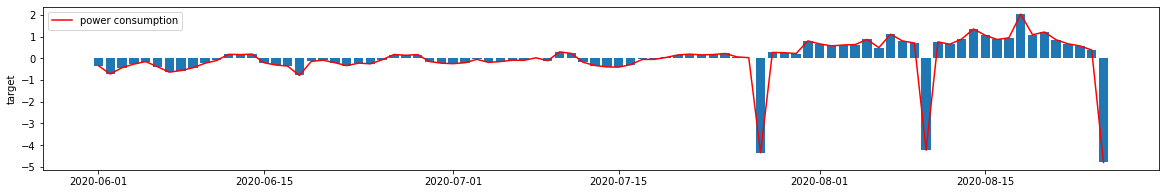

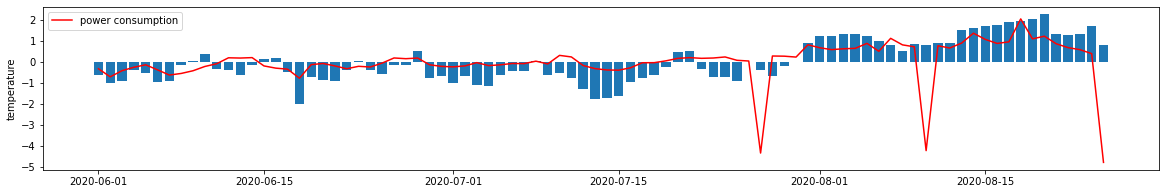

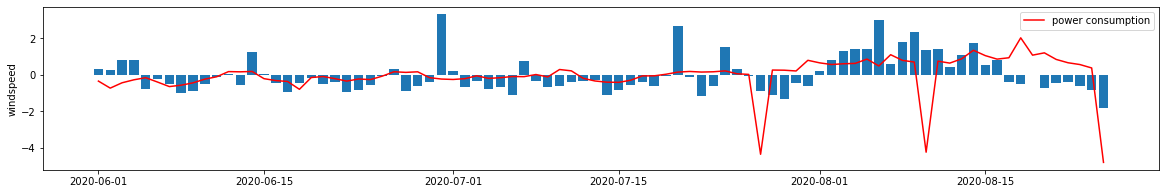

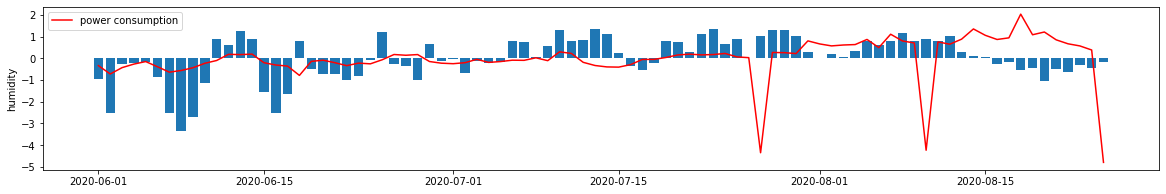

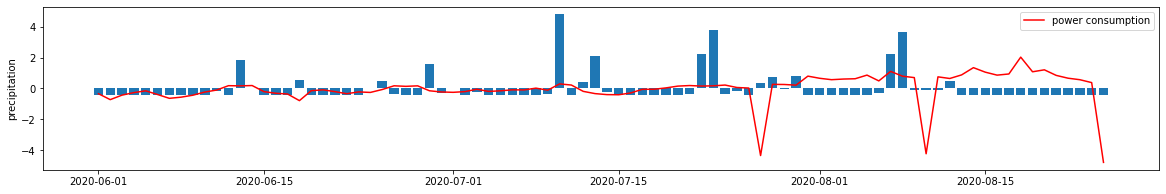

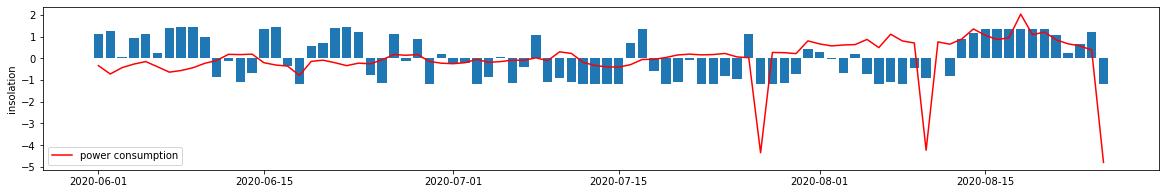

In [276]:
columns = ['target', 'temperature', 'windspeed', 'humidity', 'precipitation', 'insolation']

df = building_mean_date[columns]
normalized_df = (df - df.mean()) / df.std()

for c in columns:
    fig = plt.figure(figsize = (20,3))
    plt.plot(normalized_df.index, normalized_df.target, color="red", label="power consumption")
    plt.bar(normalized_df.index, getattr(normalized_df, c))
    plt.ylabel(c)
    plt.legend()
    plt.show()

## 냉방시설 유무에 따른 전력사용량 차이 (빌딩평균)

In [264]:
cool_buildings = train[train['nelec_cool_flag']==1.0]
cool_mean_date = cool_buildings.groupby('date').mean()

no_cool_buildings = train[train['nelec_cool_flag']==0.0]
no_cool_mean_date = no_cool_buildings.groupby('date').mean()

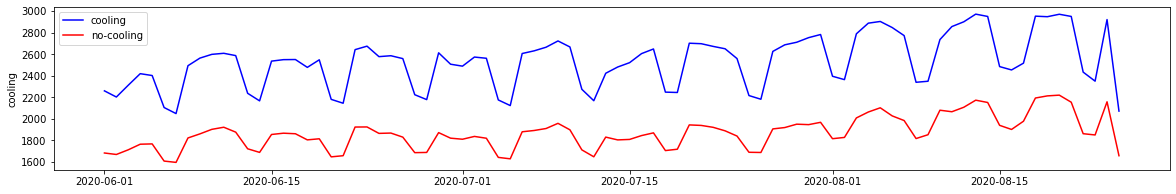

In [275]:
fig = plt.figure(figsize = (20,3))
plt.plot(cool_mean_date.index, cool_mean_date.target, color="blue", label="cooling")
plt.plot(no_cool_mean_date.index, no_cool_mean_date.target, color="red", label="no-cooling")
plt.ylabel('cooling')
plt.legend()
plt.show()

In [277]:
# 불쾌지수
# 참고 : https://www.weatheri.co.kr/useful/useful04.php)
def DI(temp, humid):
    return 0.81 * temp +0.01 * humid * (0.99*temp - 14.3)+ 46.3

In [278]:
train['DI'] = DI(train['temperature'], train['humidity'])

<AxesSubplot:xlabel='DI', ylabel='target'>

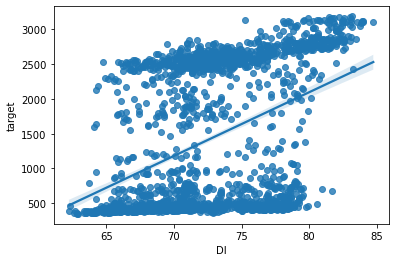

In [284]:
sns.regplot(data = train[train['num'] == 10], x = 'DI', y = 'target')